# Scatter plot with regression

This exercise applies to the NASA meteorite dataset the example of scatter plot with regression chart [presented in the Python graph gallery](https://www.python-graph-gallery.com/scatterplot-with-regression-fit-in-matplotlib), which you can consult for guidance.

ASSIGNMENTS

* using the NASA meteorite data, do a scatter plot of year (on the X axis) vs. average mass of the found meteorites (on the Y axis)
  * remember that we have a function dedicated to data loading in the `data_manager.py` script
* given the nature of the dataset, perform some simple data exploration and remove outliers entries so that the plot makes sense
* finally, add a linear regression line
* bonus data inference question: is it true that with the progress of technology we are finding smaller meteorites?

# Load the meteorite data

We'll need to load the meteorite data and extract the year as a numeric column, so that we can do proper plots.

In [ ]:
%run data_manager.py
df = load_meteorites(local_file = '../data/NASA_meteorite_cleaned.pickle.zip')
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,year_as_date
0,Aachen,1,Valid,L5,21.0,Fallen,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)",1880-01-01
1,Aarhus,2,Valid,H6,720.0,Fallen,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)",1951-01-01
2,Abee,6,Valid,EH4,107000.0,Fallen,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)",1952-01-01
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fallen,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)",1976-01-01
4,Achiras,370,Valid,L6,780.0,Fallen,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)",1902-01-01


In so far the date are recorded as a DateTime column, but for plots we'll need something simpler.

In [ ]:
#a new column, with just the entry year as a numeric value
df['year_as_number'] = df.year_as_date.dt.year

#taking a look
print(df.describe())
print('Available entries: ' + str(df.shape[0]))

                 id      mass (g)        reclat       reclong  year_as_number
count  38115.000000  3.811500e+04  38115.000000  38115.000000    38101.000000
mean   25343.139000  1.560071e+04    -39.596529     61.309359     1990.161413
std    17395.360205  6.286817e+05     46.175830     80.777583       23.615956
min        1.000000  0.000000e+00    -87.366670   -165.433330     1688.000000
25%    10831.500000  6.630000e+00    -76.716670      0.000000     1986.000000
50%    21732.000000  2.909000e+01    -71.500000     35.666670     1996.000000
75%    39887.500000  1.872900e+02      0.000000    157.166670     2002.000000
max    57458.000000  6.000000e+07     81.166670    178.200000     2101.000000
Available entries: 38115


An attentive student will notice a discrepancy between the total number of entries (i.e. the number of rows) and the number of actually available data. This is because some of the "year_as_date" values are NaT (not a time) and cannot be converted properly (for details on why this happens, see the `load_meteorites()` function.

Let's just remove the lines not available and be happy with it.

In [ ]:
df = df.dropna()
print('Available entries: ' + str(df.shape[0]))

Available entries: 38101


# Extract the average mass per year

We don't need to keep all the columns.

In [ ]:
#just the interesting columns
plot_data = df.loc[:, ['year_as_number', 'mass (g)']]
plot_data.head()

,year_as_number,mass (g)
0,1880.0,21.0
1,1951.0,720.0
2,1952.0,107000.0
3,1976.0,1914.0
4,1902.0,780.0


Some years have been more prolific in terms of discovered meteorites. Just for fun, let's take a look at the tally per year.

In [ ]:
plot_data.year_as_number.value_counts()

1979.0    3045
1988.0    2295
1998.0    2147
2003.0    1754
2006.0    1616
          ... 
1821.0       1
1785.0       1
1749.0       1
1773.0       1
1794.0       1
Name: year_as_number, Length: 239, dtype: int64

The assignment asks us to work on the average mass per year. That's a job for [pandas DataFrame groupby() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).

(As a side note, remember that you can always apply custom functions to the groups via the split-apply-combine pattern, as explained [here](https://sean-turner.medium.com/applying-custom-functions-to-groupby-objects-in-pandas-61af58955569))

In [ ]:
#average mass of meteorite per year
plot_data = plot_data.groupby('year_as_number').mean()
plot_data.head()

,mass (g)
year_as_number,
1688.0,695.0
1715.0,7000.0
1716.0,1700.0
1723.0,39.0
1724.0,98000.0


Let's check that we now have a single entry per year using the same command we used a couple of cells ago:

In [ ]:
plot_data.year_as_number.value_counts()
#error...

AttributeError: ignored

Whops!

The grouping operation moved the "year_as_number" column to the index role, effectively removing it from the data structure.

We'll need a slightly different command:

In [ ]:
plot_data.index.value_counts()

2011.0    1
1954.0    1
1890.0    1
1894.0    1
1913.0    1
         ..
1988.0    1
1923.0    1
1980.0    1
1934.0    1
1688.0    1
Name: year_as_number, Length: 239, dtype: int64

As expected, one entry per year. We can proceed!

# A simple scatter plot

Nothing fancy here, let's just instantiate a layout and [add a scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) to the axes.

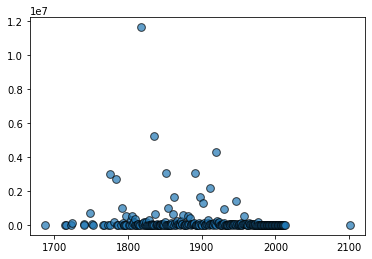

In [ ]:
#the usual import
from matplotlib import pyplot as plt

#for simplicity we'll extract the x and y values in two lists
x = plot_data.index
y = plot_data['mass (g)']

#initializa the layout
fig, ax = plt.subplots()

#add the scatterplot, with some minimal visual tweaking
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

The plot is... underwhelming. The presence of very big outliers (please note the y scale) means that the vast majority of our data is squeezed at the bottom of the plot.

Luckily the assignment explicitly asked us to remove outliers. Let's take a look at the distribution of the asteroid masses.

# Removing outliers

(array([227.,   5.,   4.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([2.00000000e-01, 1.16462852e+06, 2.32925684e+06, 3.49388516e+06,
        4.65851348e+06, 5.82314180e+06, 6.98777012e+06, 8.15239844e+06,
        9.31702676e+06, 1.04816551e+07, 1.16462834e+07]),
 <a list of 10 Patch objects>)

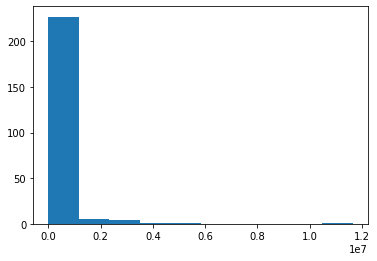

In [ ]:
plt.hist(y)

That's... very skewed. Let's take a look at the quantiles, e.g. by using [numpy's quantile() function](https://numpy.org/doc/stable/reference/generated/numpy.quantile.html).

In [ ]:
import numpy as np
#asking for the border that separate 20%, 50% and 80% of the mass distribution
np.quantile(a = df['mass (g)'], q = [0.2, 0.5, 0.8])

array([  4.7 ,  29.09, 299.  ])

We have some asteroids with mass on the tens of millions of grams (1 million of grams is about 44 medium sized grizzly bears), but 80% of them are under 299 grams.

Let's remove everything that weights 300 grams or more.

In [ ]:
plot_data = df.loc[:, ['year_as_number', 'mass (g)']]
plot_data = plot_data[plot_data['mass (g)'] < 300]
plot_data = plot_data.groupby('year_as_number').mean()

And redo the scatter plot.

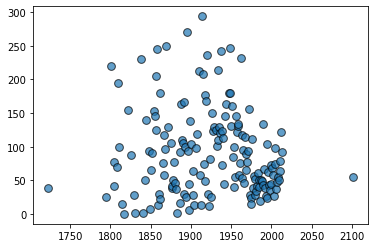

In [ ]:
x = plot_data.index
y = plot_data['mass (g)']

#initializa the layout
fig, ax = plt.subplots()

#add the scatterplot, with some minimal visual tweaking
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fitting a linear regression

We'll explicitly fit a simple linear model using [numpy's polyfit() function](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html).

You may remember from high school that a linear fit is completely defined by two parameters, the slope of the line (usually called "b") and the intercept of the line (usually called "a"), as per the formula:

y = a + x * b

In [ ]:
#deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

#computing the corresponding values, for the fitted line,
#for each available year (which we stored in the "x" variable)
y_fit = a + b * x

Time to redo the scatter plot, but adding the linear fit.

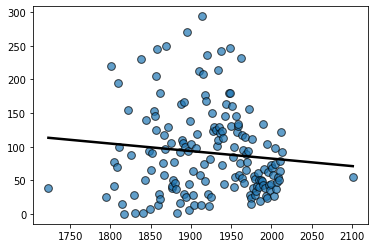

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")
ax.plot(x, y_fit, color="k", lw=2.5);

# Bonus question

**Q**: is it true that with the progress of technology we are finding smaller meteorites?

**A**: it appears that yes, we are finding smaller and smaller meteorites, as inferred by the negative slope of the fitted line.

# Faster and nicer plot with seaborn

Seaborn offers a solution to the scatter + fit problem with a single function called [regplot()](https://seaborn.pydata.org/generated/seaborn.regplot.html), which can also show the confidence intervals.

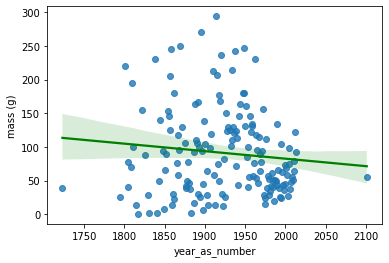

In [ ]:
import seaborn as sns

ax = sns.regplot(x=x, y=y, ci=95, line_kws={"color": 'green'})

You still need to fit your data with numpy if you want the numeric values for slope and intercept, though.